### Assignment 5 - Bayesian Networks

#### Beltrán Liniers  nº57646

#### Luís Santos nº57470

### Redes Bayesianas

Neste notebook vão ser tratadas as redes bayesianas, as quais representam relações de probabilidade condicionada. Medem a probabilidade de ocorrência de um nó (variável) em função de outros nós com os que está relacionado.

Vamos trabalhar com uma rede com 4 nós. O nó inicial é o A que está ligado ao B e ao C. O B do seu lado está conetado com o D e também com o C. As probabilidades de ocorrência de cada um dos nós estão representados no grafo a seguir. No caso dos nós B, C e D estão condicionadas às probabilidades de A e B.



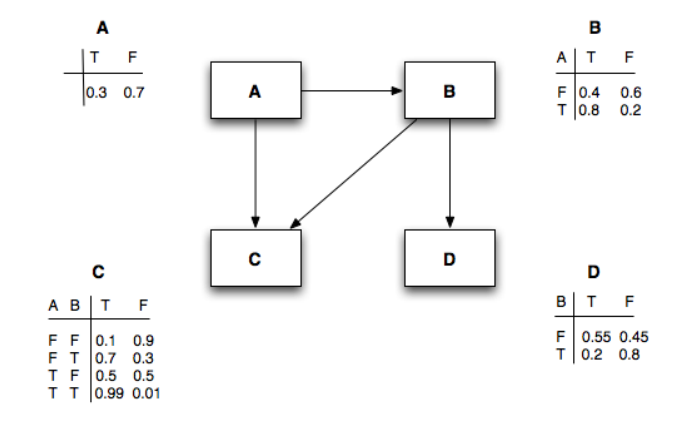

In [2]:
from pomegranate import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.naive_bayes import CategoricalNB
from sklearn import datasets
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

A continuação temos programado a informação do grafo anterior em forma de tabelas.

In [3]:
A = DiscreteDistribution({'T':0.3,'F':0.7})
#Parent order A
B = ConditionalProbabilityTable([['F','T',0.4],
                                ['F','F',0.6],
                                ['T','T',0.8],
                                ['T','F',0.2]],[A])

C = ConditionalProbabilityTable([['F','F','T',0.1],
                                 ['F','F','F',0.9],
                                 ['F','T','T',0.7],
                                 ['F','T','F',0.3],
                                 ['T','F','T',0.5],
                                 ['T','F','F',0.5],
                                 ['T','T','T',0.99],
                                 ['T','T','F',0.01]],[A,B])

D = ConditionalProbabilityTable([['F','T',0.55],
                                ['F','F',0.45],
                                ['T','T',0.2],
                                ['T','F',0.8]],[B])

s1 = Node(A,name='A')
s2 = Node(B, name='B')
s3 = Node(C, name='C')
s4 = Node(D, name='D')

model = BayesianNetwork('Casual Net')
model.add_states(s1,s2,s3,s4)
model.add_edge(s1,s2)
model.add_edge(s1,s3)
model.add_edge(s2,s3)
model.add_edge(s2,s4)
model.bake()

Nos quadros a seguir vai-se prever uma série de probabilidades de ocorrência dos nós A, B e C dados uns estados de A, B, C e D.

A saída do método predict_proba contém um array com 4 elementos. Em cada umo deles indica-se a probabilidade de True ou False de todos aqueles nós que não participam na parte condicional.

Assim, no primeiro exemplo queremos saber a probabilidade de A ser True dado que tanto C como D foram True. No primeiro elemento do array temos duas probabilidades, as quais representam as de o nó A tomar o valor True ou false, respeitivamente. O segundo elemento mostra as mesmas informações relativas ao nó B. O terceiro e o quarto elemento são as condições que marcámos no enunciado, ambas duas True.


Como resultado obtemos que:

a)



In [4]:
print("Probability of A=T given C=T and D=T")
model.predict_proba([[None,None,'T','T']])

Probability of A=T given C=T and D=T


[array([{
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "T" : 0.5054138717420109,
                    "F" : 0.49458612825798914
                }
            ],
            "frozen" : false
        }                                    ,
        {
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "T" : 0.6483149049313832,
                    "F" : 0.3516850950686168
                }
            ],
            "frozen" : false
        }                                    , 'T', 'T'], dtype=object)]

Resposta: $P(A = T | C = T, D = T) = 0.5054$

b)






In [5]:
print("Probability of A=T given D=F")
model.predict_proba([[None,None,None,'F']])

Probability of A=T given D=F


[array([{
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "T" : 0.34651898734177244,
                    "F" : 0.6534810126582277
                }
            ],
            "frozen" : false
        }                                     ,
        {
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "T" : 0.6582278481012659,
                    "F" : 0.34177215189873406
                }
            ],
            "frozen" : false
        }                                    ,
        {
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "T" : 0.6084545745874058,
                    "F" : 0.3915454254125941

Resposta: $   P(A = T | D = F) = 0.3465$

c)


In [6]:
print("Probability of B=T given C=T")
model.predict_proba([[None,None,'T',None]])

Probability of B=T given C=T


[array([{
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "T" : 0.5253830090147861,
                    "F" : 0.4746169909852139
                }
            ],
            "frozen" : false
        }                                    ,
        {
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "T" : 0.8100843263425553,
                    "F" : 0.1899156736574448
                }
            ],
            "frozen" : false
        }                                    , 'T',
        {
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "T" : 0.2664704857800823,
                    "F" : 0.73352951421991

Resposta: $P(B=T|C=T) = 0.8100$

d) 


In [7]:
print("Probability of B=T given A=T and C=T")
model.predict_proba([['T',None,'T',None]])

Probability of B=T given A=T and C=T


[array(['T', {
                 "class" : "Distribution",
                 "dtype" : "str",
                 "name" : "DiscreteDistribution",
                 "parameters" : [
                     {
                         "T" : 0.8878923766816139,
                         "F" : 0.11210762331838604
                     }
                 ],
                 "frozen" : false
             }                                    , 'T',
        {
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "T" : 0.23923766816143516,
                    "F" : 0.7607623318385648
                }
            ],
            "frozen" : false
        }                                     ], dtype=object)]

Resposta: $P(B = T | A = T, C = T) = 0.8878$

e) 

In [8]:
print("Probability of C=T given A=F, B=F and D=F")
model.predict_proba([['F','F',None,'F']])

Probability of C=T given A=F, B=F and D=F


[array(['F', 'F', {
                      "class" : "Distribution",
                      "dtype" : "str",
                      "name" : "DiscreteDistribution",
                      "parameters" : [
                          {
                              "T" : 0.10000000000000016,
                              "F" : 0.8999999999999999
                          }
                      ],
                      "frozen" : false
                  }                                     , 'F'],
       dtype=object)]

Resposta: $P(C=T|A=F,B=F,D=F) = 0.10$

#### Problem 2

Continuando com os modelos bayesianos vamos desenvolver um Naive Bayes. Depois vai ser comparada a sua performance com um Random Forest.

Para tal, foi escolhido o conjunto de dados Iris, que contém uma série de informações sobre as medidas de plantas e flores. O objetivo é classificar as observações nos três tipos de plantas dos que dispõe a base de dados.

O primeiro passo foi dividir o conjunto em duas partes, treino e test.

In [39]:
iris = datasets.load_iris()

In [54]:
X = iris.data
y= iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 23)

In [55]:
X_train.shape

(120, 4)

O modelo probabilístico Naive Bayes só funciona com variáveis discretas, então vamos discretizar as nossas variáveis independentes de maneira uniforme

In [60]:
def discretize(X,n_bins):
    kbins = KBinsDiscretizer(n_bins=n_bins, encode='onehot-dense', strategy='uniform')
    kbins.fit(X)
    xt = kbins.transform(X)
    return xt

In [61]:
X_train_disct = discretize(X_train,3)
X_train_disct.shape

(120, 12)

Para encontrar o modelo mais ótimo vamos modelizar com diferentes valores de alpha e o método de cross validation. Este parâmetro suavizar a série para evitar que as probabilidades condicionadas tomem valor indeterminado. 

In [57]:
scores = []
for alpha in range(1,21):
    modelNB = CategoricalNB(alpha=alpha)
    cv_res = cross_validate(modelNB,X_train_disct,y_train) 
    scores.append({'alpha':alpha,'acc':np.mean(cv_res['test_score'])})

In [58]:
df = pd.DataFrame(scores)
df[0:16] #.loc[df['acc']==df['acc'].max()]

,alpha,acc
0,1,0.950000
1,2,0.950000
2,3,0.950000
3,4,0.950000
4,5,0.950000
5,6,0.950000
6,7,0.950000
7,8,0.950000
8,9,0.950000
9,10,0.950000


Até a um alpha igual a 13 o accuracy no conjunto de train é de 0.95. 

In [59]:
CategNB = CategoricalNB(alpha=1)
CategNB.fit(X_train_disct,y_train)
X_test_disct= discretize(X_test,3)
y_preds = CategNB.predict(X_test_disct)
print("Accuracy: ",accuracy_score(y_preds,y_test))

Accuracy:  0.9


O modelo com o conjunto de teste obteve um accuracy de 0.9

O random forest é uma combinação de árvores de decissão que visam otimizar a classificação. A diferença entre estas árvores é o conjunto de train usado, seleção aleatória com reposição, e a lista de features utilizadas na contrucção do modelo.

Neste caso também utilizou-se diferentes combinações de parâmetros relativamente ao critério, gini e entropia, assim como a profundidade máxima da árvore e o número de estimadores. Estes critérios todos foram introduzidos numa GridSearch para facilitar a modelização.

O resultado ótimo resultou numa árvore com critério entropy, com profundidade 3 e 30 estimadores. O accuracy obtido com o conjunto de teste foi de 1



In [63]:
params = {'n_estimators':np.arange(5,100,25),"criterion":("gini","entropy"),"max_depth":np.arange(2,10)}
clf = GridSearchCV(RandomForestClassifier(),params)
clf.fit(X_train,y_train)
clf.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 30}

In [65]:
rfc = RandomForestClassifier(n_estimators=30,max_depth=3,criterion='entropy')
rfc.fit(X_train,y_train)
y_preds = rfc.predict(X_test)
print("Accuracy: ",accuracy_score(y_preds,y_test))

Accuracy:  1.0


Entre os dois modelos as Random Forest, foram superiores na tarefa de classificação.